## Eliminasi Gaussian

Metode ini mengubah sistem persamaan linear menjadi bentuk matriks, kemudian matriks diubah ke bentuk Eselon Baris melalui Operasi Baris Elementer. Sistem diselesaikan dengan substitusi balik.

**Bentuk Eselon Baris:**

1. Setiap baris memiliki elemen non-nol pertama yang sama dengan 1.
2. Baris dengan elemen semua 0 dikelompokkan di bawah matriks.
3. Angka 1 (utama) pada baris lebih rendah berada lebih kanan dari 1 (utama) pada baris di atasnya.

**Operasi Baris Elementer:**

1. Menukar posisi dua persamaan.
2. Mengalikan persamaan dengan bilangan bukan nol.
3. Mengganti persamaan dengan jumlah persamaan itu sendiri dan kelipatan persamaan lainnya.


## Contoh
Selesaikan persamaan berikut:
$$
8x_1+9x_2+x_3=19\\
x_1+x_2+3x_3=9\\
2x_1+x_2+x_3=5\
$$

Deklarasikan RowSwap, RowScale, dan RowAdd

In [ ]:
import numpy as np

def RowSwap(A,k,l):
# =============================================================================
#     A is a NumPy array.  RowSwap will return duplicate array with rows
#     k and l swapped.
# =============================================================================
    m = A.shape[0]  # m is number of rows in A
    n = A.shape[1]  # n is number of columns in A

    B = np.copy(A).astype('float64')

    for j in range(n):
        temp = B[k][j]
        B[k][j] = B[l][j]
        B[l][j] = temp

    return B

def RowScale(A,k,scale):
# =============================================================================
#     A is a NumPy array.  RowScale will return duplicate array with the
#     entries of row k multiplied by scale.
# =============================================================================
    m = A.shape[0]  # m is number of rows in A
    n = A.shape[1]  # n is number of columns in A

    B = np.copy(A).astype('float64')

    for j in range(n):
        B[k][j] *= scale

    return B

def RowAdd(A,k,l,scale):
# =============================================================================
#     A is a numpy array.  RowAdd will return duplicate array with row
#     l modifed.  The new values will be the old values of row l added to
#     the values of row k, multiplied by scale.
# =============================================================================
    m = A.shape[0]  # m is number of rows in A
    n = A.shape[1]  # n is number of columns in A

    B = np.copy(A).astype('float64')

    for j in range(n):
        B[l][j] += B[k][j]*scale

    return B

Kita buat array NumPy dengan nilai-nilai ini. Kita akan memberi nama pada array A. Agar bisa dipanggil lagi nanti.


In [ ]:
import numpy as np
A=np.array([[8,9,1,19],[1,2,3,9],[2,1,1,5]])
print(A)

[[ 8  9  1 19]
 [ 1  2  3  9]
 [ 2  1  1  5]]


###Fungsi

RowSwap() : Menukar posisi persamaan.


RowScale() : Mengkalikan persamaan.


RowAdd() : Menambahkan persamaan yang salah satunya sudah dikalikan.

In [ ]:
# Contoh RowSwap
A1 = RowSwap(A, 0, 1)
print(A1)

In [ ]:
#Tambah -8 kali baris 0 ke baris 1
A2 = RowAdd(A1, 0, 1, -8)
print(A2)

In [ ]:
#Tambah -2 kali baris 0 ke baris 2
A3 = RowAdd(A2, 0, 2, -2)
print(A3)

In [ ]:
#Kalikan baris 1 dengan -1/7
A4 = RowScale(A3, 1, -1/7)
print(A4)

In [ ]:
#Tambah 3 kali baris 1 ke baris 2
A5 = RowAdd(A4, 1, 2, 3)
print(A5)

In [ ]:
#Kalikan baris 2 dengan 1/4
A6 = RowScale(A5, 2, 1/4)
print(A6)

$$
x_1+2x_2+3x_3=9\\
x_2+3.28571429x_3=7.57142857\\
x_3=2\\
$$


In [ ]:
x3 = 2
print('x3:', x3)
x2 = 7.57142857-(3.28571429*x3)
print("x2:", round(x2))
x1 = 9 - 2*x2 - 3*x3
print('x1:', round(x1))

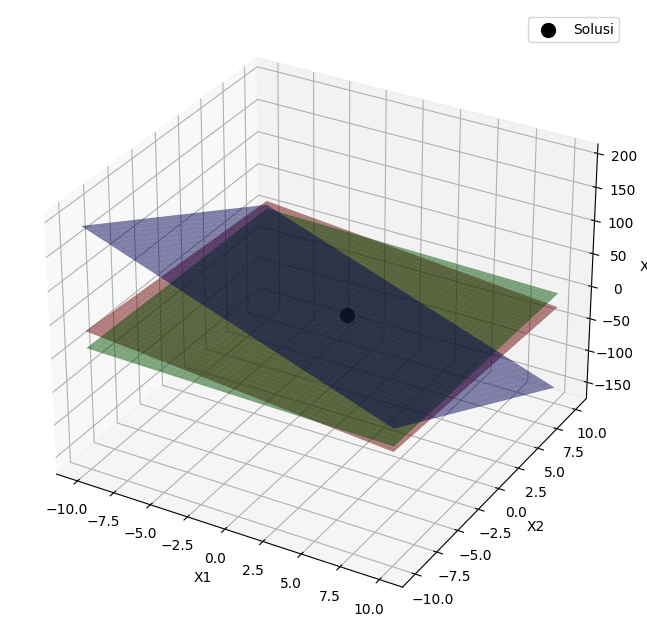

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Matriks koefisien
A = np.array([[8, 9, 1],
              [1, 1, 3],
              [2, 1, 1]])

# Vektor hasil
B = np.array([19, 9, 5])

# Menghitung solusi
x = np.linalg.solve(A, B)

# Plot persamaan dalam bentuk 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Buat sumbu x, y, z
x_vals = np.linspace(-10, 10, 100)
y_vals = np.linspace(-10, 10, 100)
x_vals, y_vals = np.meshgrid(x_vals, y_vals)

# Persamaan 1: 8x₁ + 9x₂ + x₃ = 19
z_vals = (19 - A[0,0]*x_vals - A[0,1]*y_vals) / A[0,2]
ax.plot_surface(x_vals, y_vals, z_vals, alpha=0.5, color='blue')

# Persamaan 2: x₁ + x₂ + 3x₃ = 9
z_vals = (9 - A[1,0]*x_vals - A[1,1]*y_vals) / A[1,2]
ax.plot_surface(x_vals, y_vals, z_vals, alpha=0.5, color='green')

# Persamaan 3: 2x₁ + x₂ + x₃ = 5
z_vals = (5 - A[2,0]*x_vals - A[2,1]*y_vals) / A[2,2]
ax.plot_surface(x_vals, y_vals, z_vals, alpha=0.5, color='red')

# Tambahkan titik solusi
ax.scatter(x[0], x[1], x[2], color='black', s=100, label='Titik')

# Label sumbu
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

# Tambahkan legenda
plt.legend()

plt.show()
